In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [99]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [100]:
y.index = y.name

In [101]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [102]:
y.index = pd.to_datetime(y.index)

In [103]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [104]:
from pytrends.request import TrendReq

In [137]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ['Amazon', 'AirPods', 'MacBook Air', 'Dynamic Island', 'Apple Watch', 'Keyboard', 'Jessica', 'Kiwi', 'Grace']  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [138]:
df = df.resample("Q").mean()

In [139]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [74]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [76]:
from sklearn.linear_model import Lasso

In [141]:
# With a lambda of .5, all the coefficients reduced to zero. We consider the parameter too large and reduced it
# to .05
lasso = Lasso(alpha = .05)

In [142]:
las = lasso.fit(X_scaled, y)

In [143]:
coefficients = las.coef_

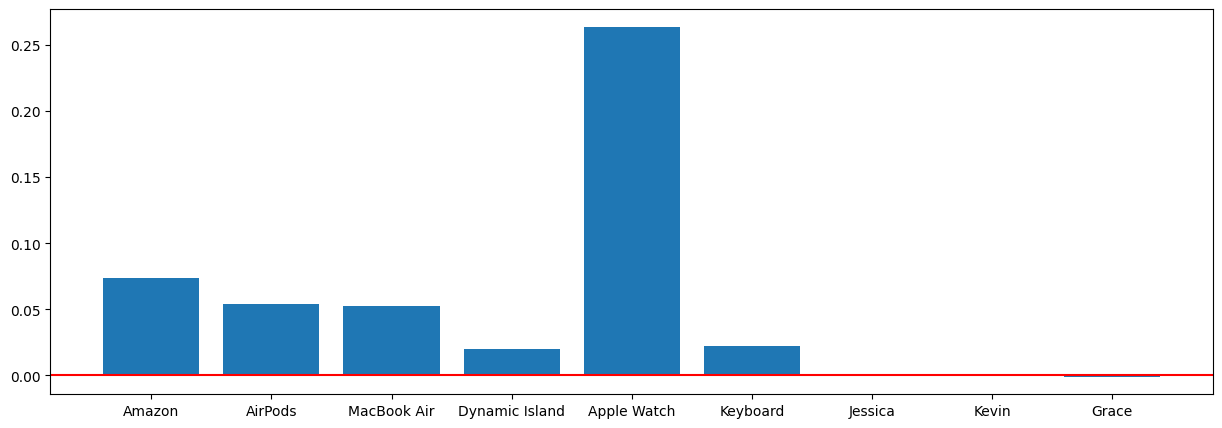

In [147]:
plt.figure(figsize = (15,5))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = "red")
plt.xticks(range(len(coefficients)), X.columns)
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Yes. Among the nine search terms, the first six of them seem positively correlated with Apple. They are Amazon', 'AirPods', 'MacBook Air', 'Dynamic Island', 'Apple Watch' and 'Keyboard', either products of Apple or other similar companies . However, the last three search term 'Jessica', 'Kevin' and 'Grace' prove to be unrelated to Apple.